<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   WATCH'S BRAND     377 non-null    object
 1   NAME OF WATCH     377 non-null    object
 2   DISCOUNTED PRICE  376 non-null    object
 3   M.R.P.            287 non-null    object
 4   DISCOUNT          265 non-null    object
 5   RATING            376 non-null    object
 6   NUMBER OF RATING  376 non-null    object
 7   URL OF WATCH      377 non-null    object
dtypes: object(8)
memory usage: 23.7+ KB
None
  WATCH'S BRAND                                      NAME OF WATCH  \
0        Fossil  Fossil Men Leather Analog Black Dial Watch-Fs5...   
1          BOSS  Analog Grey Dial Men's Watch-1513815 Genuine L...   
2        Fossil  Analog White Dial Men's Watch-FS4795 Stainless...   
3        Fossil  Fossil Townsman Analog Brown Dial Men's Watch-...   
4        Fossil                         

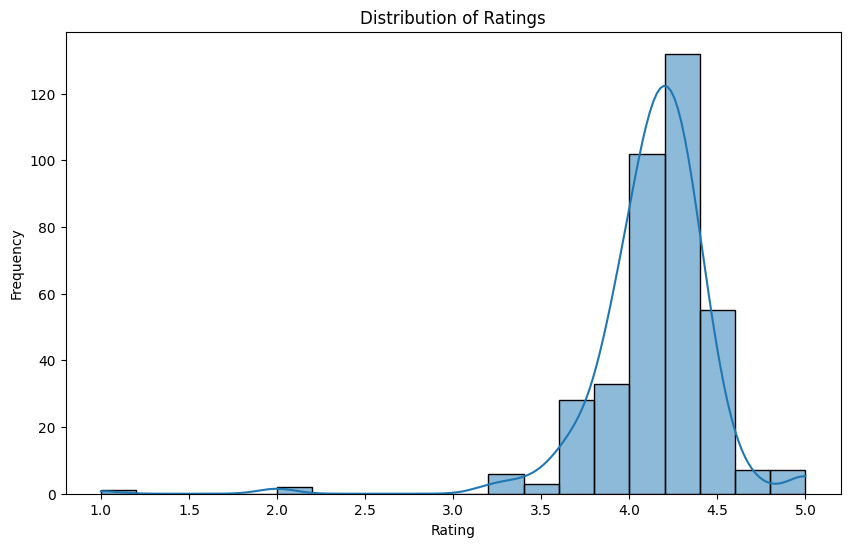

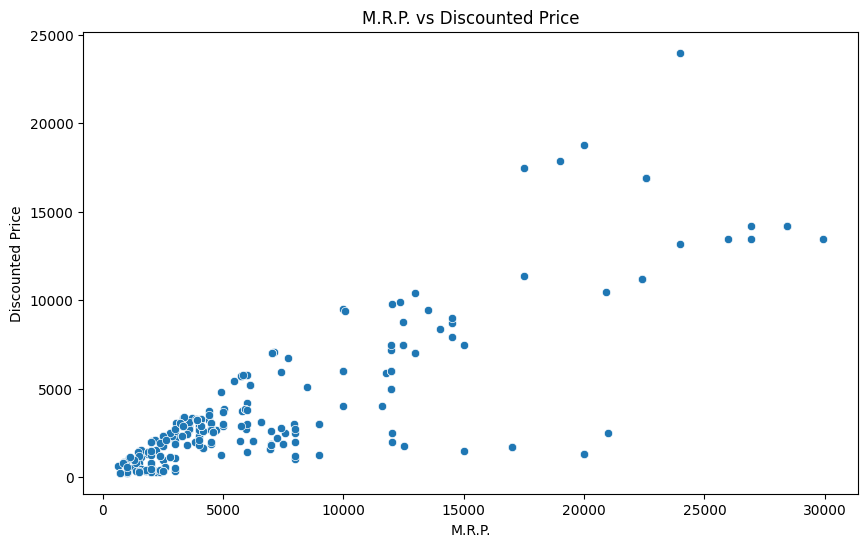

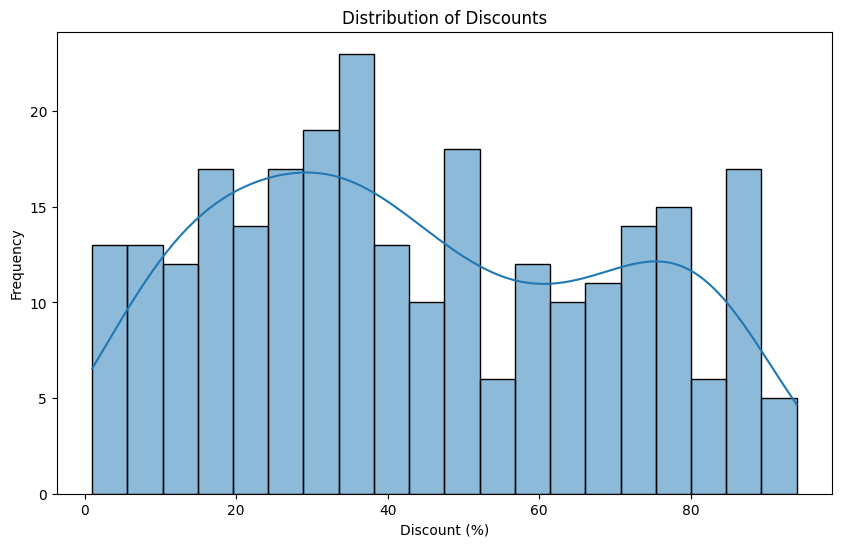

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
file_path = "/content/Copy of amazon_watches_webscraping(1).csv"  # Replace with the actual path to your file
data = pd.read_csv(file_path, encoding='latin1')

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe(include='all'))

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Convert RATING to float
data['RATING'] = data['RATING'].str.extract(r'(\d+\.\d+)').astype(float)

# Convert NUMBER OF RATING to int after removing commas and handling non-numeric values
data['NUMBER OF RATING'] = data['NUMBER OF RATING'].str.replace(',', '', regex=False).str.extract(r'(\d+)')
data['NUMBER OF RATING'] = data['NUMBER OF RATING'].astype(float).astype('Int64')

# Convert DISCOUNTED PRICE and M.R.P. to int after removing currency symbols and handling non-numeric values
data['DISCOUNTED PRICE'] = pd.to_numeric(data['DISCOUNTED PRICE'].str.replace(r'[?,]', '', regex=True), errors='coerce')
data['M.R.P.'] = pd.to_numeric(data['M.R.P.'].str.replace(r'[?,]', '', regex=True), errors='coerce')

# Convert DISCOUNT to percentage
data['DISCOUNT'] = data['DISCOUNT'].str.extract(r'(\d+)%').astype(float)

# Extract brand names
data['BRAND'] = data["WATCH'S BRAND"]

# Calculate total number of ratings for each brand
brand_ratings = data.groupby('BRAND')['NUMBER OF RATING'].sum().reset_index()

# Calculate market share for each brand
total_ratings = brand_ratings['NUMBER OF RATING'].sum()
brand_ratings['MARKET SHARE'] = (brand_ratings['NUMBER OF RATING'] / total_ratings) * 100

# Display the brand ratings and market share
print(brand_ratings)

# Get top 5 best-selling watches for each brand
top_5_watches = data.groupby('BRAND').apply(lambda x: x.nlargest(5, 'NUMBER OF RATING')).reset_index(drop=True)

# Display the top 5 best-selling watches for each brand
print(top_5_watches)

# Define price ranges
bins = [0, 2000, 4000, 6000, 8000, 10000, float('inf')]
labels = ['0-2K', '2K-4K', '4K-6K', '6K-8K', '8K-10K', '10K+']
data['PRICE RANGE'] = pd.cut(data['M.R.P.'], bins=bins, labels=labels)

# Identify top rated watches within each price range
top_rated_per_price_range = data.groupby('PRICE RANGE').apply(lambda x: x.nlargest(1, 'RATING')).reset_index(drop=True)

# Display the top rated watches per price range
print(top_rated_per_price_range)

# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['RATING'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Relationship between M.R.P. and discounted price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['M.R.P.'], y=data['DISCOUNTED PRICE'])
plt.title('M.R.P. vs Discounted Price')
plt.xlabel('M.R.P.')
plt.ylabel('Discounted Price')
plt.show()

# Distribution of discounts
plt.figure(figsize=(10, 6))
sns.histplot(data['DISCOUNT'], bins=20, kde=True)
plt.title('Distribution of Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()

# Top rated watches
top_rated = data.nlargest(10, 'RATING')

fig = px.bar(top_rated, x='NAME OF WATCH', y='RATING', title='Top 10 Rated Watches')
fig.show()

# Plotting the market share of top-selling brands
fig = px.pie(brand_ratings, names='BRAND', values='MARKET SHARE', title='Market Share of Top-Selling Brands')
fig.show()
